# Ford GoBike System
## by Aly Essam

## Investigation Overview

> - Bay Wheels is a regional public bicycle sharing system in California's San Francisco Bay Area. It is operated by Motivate in a partnership with the Metropolitan Transportation Commission and the Bay Area Air Quality Management District.
- Bay Wheels is the first regional and large-scale bicycle sharing system deployed in California and on the West Coast of the United States. It was established as Bay Area Bike Share in August 2013. 
- As of January 2018, The Bay Wheels system had over 2,600 bicycles in 262 stations across San Francisco, East Bay and San Jose.

## Dataset Overview

> - There are 183412 rows in the fordgobike trips dataset.
- The trips in the dataset have 16 variables (duration_sec, start_time, end_time, start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude ,end_station_longitude, bike_id, user_type, member_birth_year, member_gender and bike_share_for_all_trip)
- There are 4646 bikes, 329 start and end stations

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
bike_df = pd.read_csv('201902-fordgobike-tripdata.csv')
bike_df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
## Removing Null Values 
bike_df.dropna(inplace = True, subset=['member_birth_year', 'start_station_id'])

## Correcting data types of the variables
bike_df['start_time'] = pd.to_datetime(bike_df['start_time'])
bike_df['end_time'] = pd.to_datetime(bike_df['end_time'])
bike_df['member_birth_year']  = bike_df['member_birth_year'].astype('int64')
bike_df['start_station_id'] = bike_df['start_station_id'].astype('int64')
bike_df['end_station_id'] = bike_df['end_station_id'].astype('int64')

## making bike_share_for_all_trip as boolean instead of (Yes,No)
bike_df['bike_share_for_all_trip'] = (bike_df['bike_share_for_all_trip'] == 'Yes')

## making Age column based on birth year 
bike_df['age'] = 2020 - bike_df['member_birth_year']

## Making Day and Hour columns
bike_df['day_name']= bike_df['start_time'].dt.day_name()
bike_df['Hour']= bike_df['start_time'].dt.hour


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Distribution of Trip Duration 

> The majority of the trips lasts less than 10 minutes and the trips lasts from 1 to 100 minutes

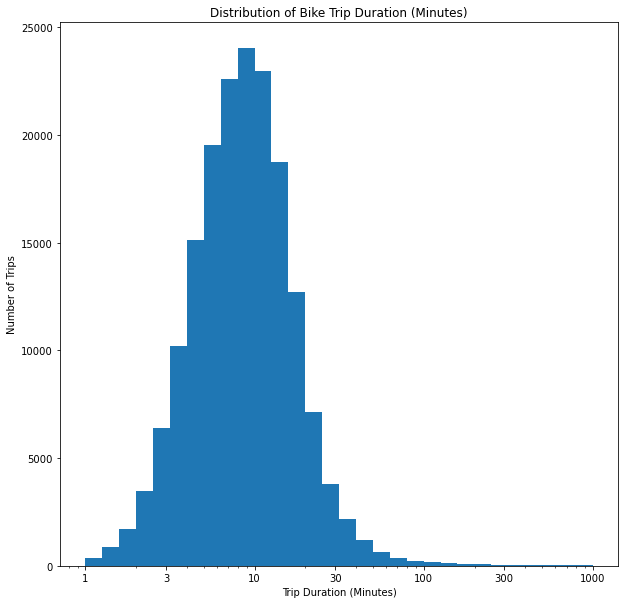

In [11]:
bike_df['duration_min'] = bike_df['duration_sec'] / 60 


plt.figure(figsize = (10,10))
ticks =  [ 1 , 3, 10, 30, 100, 300, 1000]
labels = ['{}'.format(v) for v in ticks]
bins_min = 10 ** np.arange(0, 3 + 0.1,0.1)
plt.hist(data = bike_df, x = 'duration_min', bins = bins_min);
plt.title('Distribution of Bike Trip Duration (Minutes)')
plt.xlabel('Trip Duration (Minutes)')
plt.ylabel('Number of Trips');
plt.xscale('log')
plt.xticks(ticks,labels);

## Trips per Hour Distribution

> According to the figures above, it is shown that
- The most trips per hour are at 8:00 and 17:00 which they are the start and the end of the working day 
- The least trips per hour are from 0:00 to 5:00 when the users are asleep

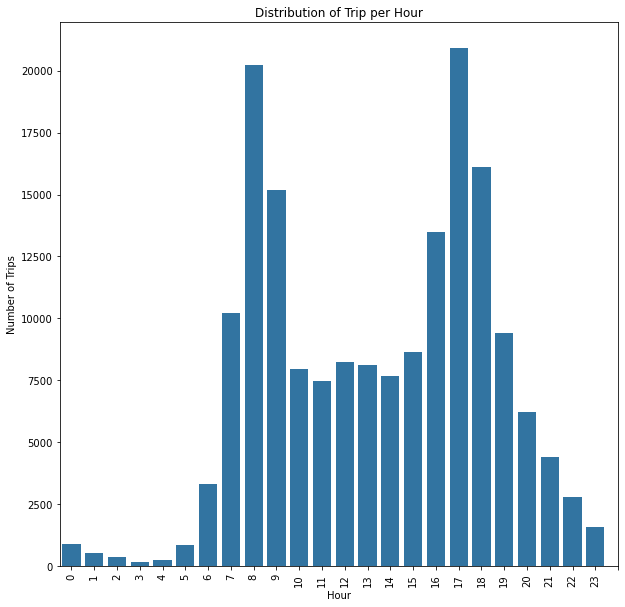

In [12]:
plt.figure(figsize = (10,10))
base_color = sb.color_palette()[0]
sb.countplot(data = bike_df, x = 'Hour', color = base_color)
plt.title('Distribution of Trip per Hour')
plt.xlabel('Hour')
plt.ylabel('Number of Trips')
plt.xticks(range(0,25,1),rotation = 90);

## Relationship between Trips per hour and Average trip duration

> According to the figure above, It is shown that
-  The Average trip duration is almost the same except the time between 3:00 as it increased rapidly due to the low trips in this hour
- There are a slight increase in the average duration during the working hours between 10:00 and 15:00

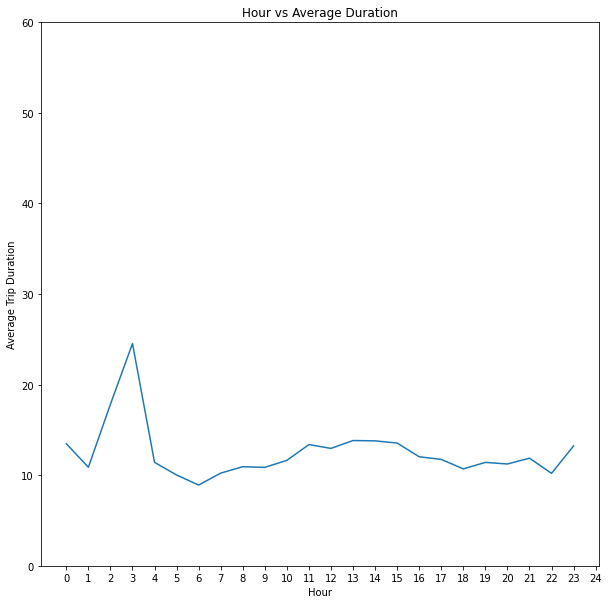

In [13]:
plt.figure(figsize = (10,10))
hour_duration = bike_df.groupby(['Hour'])['duration_min'].mean()
hour_duration_df = hour_duration.reset_index()


sb.lineplot(x = hour_duration_df['Hour'], y = hour_duration_df['duration_min'])


plt.ylim(0,60)
plt.title('Hour vs Average Duration')
plt.xlabel('Hour')
plt.ylabel('Average Trip Duration') ;
plt.xticks(range(0,25,1)) ;


## Type of Users Distribution 

> -Most of the users are subscribers

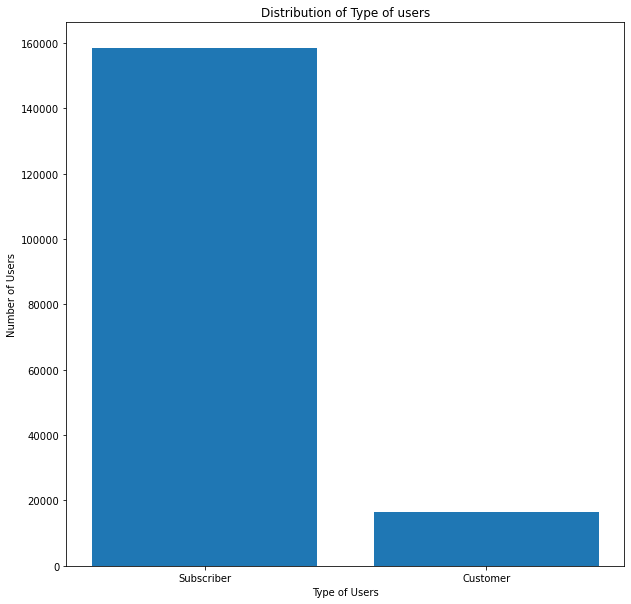

In [14]:
plt.figure(figsize = (10,10))
plt.bar(x = bike_df['user_type'].value_counts().keys(), height = bike_df['user_type'].value_counts());
plt.title('Distribution of Type of users')
plt.xlabel('Type of Users')
plt.ylabel('Number of Users');

## Relationship between Type of Users and Duration
> - The customers have higher range of trip duration and higher median trip duration than the subscribers  

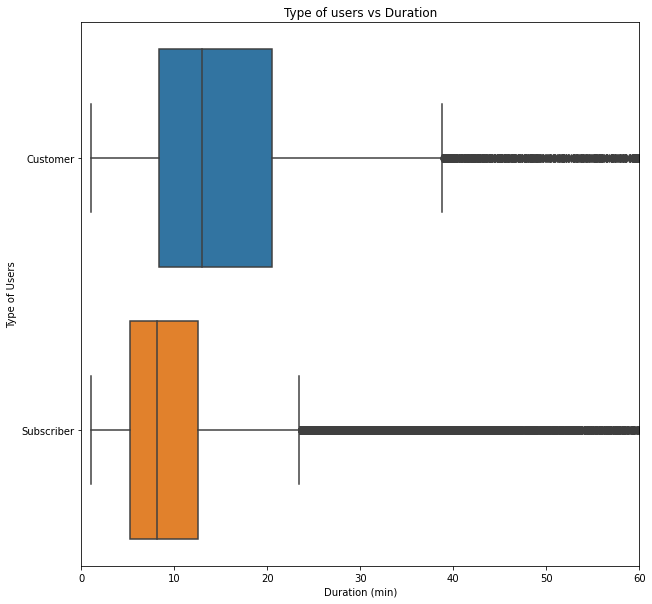

In [15]:
plt.figure(figsize = (10,10))
sb.boxplot(data = bike_df, x = 'duration_min', y = 'user_type')

plt.xlim(0,60)
plt.title('Type of users vs Duration')
plt.xlabel('Duration (min)')
plt.ylabel('Type of Users') ;

## The impact of type of users, hour on duration

- The Average Trip duration for the customers through the hours of the day is much higher than the subscribers
- The Average trip duration increased rapidly at 3:00 due to the low trips in this hour


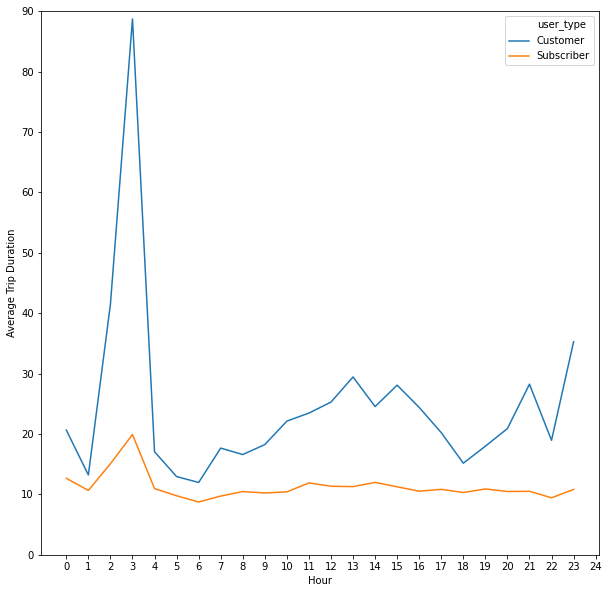

In [16]:
plt.figure(figsize = (10,10))
hour_duration = bike_df.groupby(['Hour', 'user_type'])['duration_min'].mean()
hour_duration_df = hour_duration.reset_index()


sb.lineplot(x = hour_duration_df['Hour'], y = hour_duration_df['duration_min'], hue = hour_duration_df['user_type'] )


plt.ylim(0,90)
plt.xlabel('Hour')
plt.ylabel('Average Trip Duration') ;
plt.xticks(range(0,25,1)) ;

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert slide_deck.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!